# 2D ERT modeling and inversion
## This one tries to copy the deposit shape, 


This one it's crashing when defining geom combining 3 complex shapes.
I'll try to fix this complex model and add the geothermal plume as a diffusing body (not necessary, however, since the Simple model works quite well).

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pygimli as pg
import pygimli.meshtools as mt
from pygimli.physics import ert

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

print(pg.Report())


--------------------------------------------------------------------------------
  Date: Sun Aug 27 20:35:21 2023 -05

                OS : Linux
            CPU(s) : 8
           Machine : x86_64
      Architecture : 64bit
               RAM : 15.6 GiB
       Environment : Jupyter
       File system : ext4

  Python 3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:40:32)
  [GCC 12.3.0]

           pygimli : 1.4.3
            pgcore : 1.4.0
             numpy : 1.25.0
        matplotlib : 3.7.2
             scipy : 1.11.2
           IPython : 8.14.0
           pyvista : 0.41.1
--------------------------------------------------------------------------------


## Geometry definition

Create deposit shape

(<Axes: >, None)

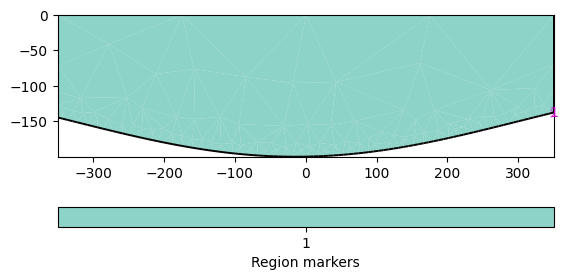

In [2]:
x = np.linspace(-350, 350, 100)
y = -150 + 50 * np.sin((x-300) / 200)
top_layer1 = [[-350, 0], [350, 0]]
bottom_layer1 = np.column_stack((x, y))[::-1]
deposit_shape = np.vstack((bottom_layer1, top_layer1))
deposit = mt.createPolygon(deposit_shape, isClosed=True, marker=1)
pg.show(deposit)

Calculate fault points position


In [3]:
x1 = -125
y2 = -250

#Find y1 and x2 so fault intersects with first layer base and it has dip = 60°

def f(p):
    x2, y1 = p
    eq1 = y1 - (-150 + 50 * np.sin((x1-300) / 200))
    eq2 = x2 - (x1 + (y2 - y1) / np.tan(np.radians(60)))
    return [eq1, eq2]

from scipy.optimize import fsolve

x2, y1 = fsolve(f, [-100, -200])

Create fault

In [4]:
fault = mt.createPolygon([[x1, y1], [x2, y2]], isClosed=False, marker=2)

Define Floresta Formation

(<Axes: >, None)

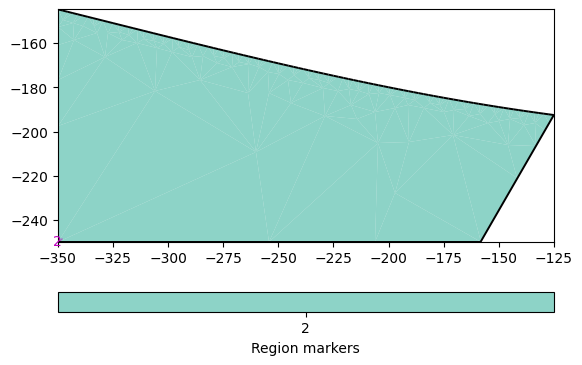

In [5]:
x_top = np.linspace(-350, x1, 100)
y_top = -150 + 50 * np.sin((x_top-300) / 200)

Floresta_top = np.column_stack((x_top,y_top))[::-1]
Floresta_bottom = [[-350, y2], [x2, y2]]
Floresta_verts = np.vstack((Floresta_bottom, Floresta_top))
Floresta_fm = mt.createPolygon(Floresta_verts, isClosed = True, marker = 2)
pg.show(Floresta_fm)

Define Cretacic Rocks

(<Axes: >, None)

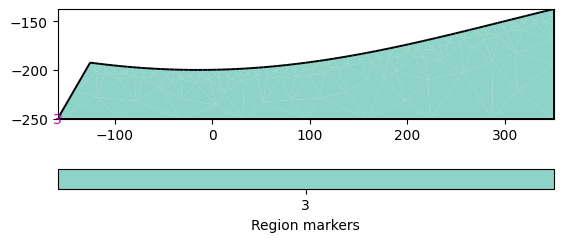

In [6]:
x_top2 = np.linspace(x1, 350, 100)
y_top2 = -150 + 50 * np.sin(((x_top2-300) / 200))

Cretacic_top = np.column_stack((x_top2,y_top2))[::-1]
Cretacic_bottom = [[x2, y2], [350, y2]]
Cretacic_verts = np.vstack((Cretacic_bottom, Cretacic_top))
Cretacic_rocks = mt.createPolygon(Cretacic_verts, isClosed = True, marker = 3)
pg.show(Cretacic_rocks)

Show Geom (Kernel crashes)

(<Axes: >, None)

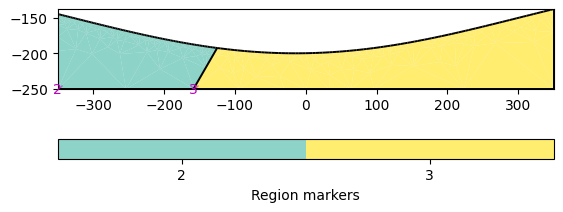

In [7]:
geom3 = Floresta_fm + Cretacic_rocks
pg.show(geom3)